In [35]:
import numpy as np
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from lssvr import LSSVR
from sklearn.preprocessing import *
from sklearn.model_selection import KFold
from sklearn.metrics import *
from sklearn.svm import SVR
%matplotlib inline    
%config InlineBackend.figure_format = 'retina' 
from sklearn.model_selection import *
sns.set(style="whitegrid", color_codes=True)
from matplotlib import rcParams
config = {
    "font.family": 'serif', # 衬线字体
    "font.size": 7.5, # 相当于六号大小
    "font.serif": ['SimSun'], # 宋体
    "mathtext.fontset": 'stix', # matplotlib渲染数学字体时使用的字体，和Times New Roman差别不大
    'axes.unicode_minus': False # 处理负号，即-号
}
rcParams.update(config)

In [2]:
# 导入数据
data=pd.read_excel("学年论文.xlsx")

In [3]:
# 贝叶斯优化
from sklearn.metrics import *
def objective(trial):
    data=pd.read_excel("学年论文.xlsx")
    y=data["外腐蚀速率（v）"]
    X=data[['含盐量（X1）', '硫酸根含量（X2）', '硫化物含量（X3）', '氯离子含量（X4）',
       '土壤电阻率（X5）', '氧化还原电位（X6）', '自然电位（X7）', '杂散电流（X8）', 'PH（X9）', '含水量（X10）',
       '破损点密度（X11）', '阴极保护（X12）']]
    sc=StandardScaler()
    X_sc=sc.fit_transform(X)
    # 设置参数范围
    C = trial.suggest_float("C", 1e-3, 1e3, log=True)
    gamma = trial.suggest_float("gamma", 1e-3, 1e3, log=True)
    X_train,X_test,y_train,y_test=train_test_split(X_sc,y,random_state=2023,test_size=0.2)
    reg=LSSVR(C=C,gamma=gamma)
    reg.fit(X_train,y_train)
    y_pre_train=reg.predict(X_train)
    y_pre_test=reg.predict(X_test)
    score=r2_score(y_test,y_pre_test)
    return score

In [4]:
%%time
import optuna
if __name__ == "__main__":
    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=500)

    print("Number of finished trials: ", len(study.trials))

    print("Best trial:")
    trial = study.best_trial

    print("  Value: ", trial.value)
    
    print("  Params: ")
    for key, value in trial.params.items():
        print("    {}: {}".format(key, value))

[I 2023-01-24 19:53:02,271] A new study created in memory with name: no-name-3bd3ad36-9034-484c-a296-6a6f034b35f2
[I 2023-01-24 19:53:02,316] Trial 0 finished with value: -0.07228060358131216 and parameters: {'C': 0.2403333504674785, 'gamma': 192.38627748174562}. Best is trial 0 with value: -0.07228060358131216.
[I 2023-01-24 19:53:02,353] Trial 1 finished with value: -0.07228060358131416 and parameters: {'C': 0.7603577646390441, 'gamma': 183.4897931103181}. Best is trial 0 with value: -0.07228060358131216.
[I 2023-01-24 19:53:02,392] Trial 2 finished with value: -0.10543921613000973 and parameters: {'C': 0.0010529465837565545, 'gamma': 0.08664248151921722}. Best is trial 0 with value: -0.07228060358131216.
[I 2023-01-24 19:53:02,436] Trial 3 finished with value: 0.37082601308647267 and parameters: {'C': 18.638776945219774, 'gamma': 0.30514478127709754}. Best is trial 3 with value: 0.37082601308647267.
[I 2023-01-24 19:53:02,482] Trial 4 finished with value: -0.07228060358131994 and pa

[I 2023-01-24 19:53:04,315] Trial 39 finished with value: 0.6788024861561133 and parameters: {'C': 496.2080787988829, 'gamma': 0.12357162751056822}. Best is trial 38 with value: 0.6894150259719211.
[I 2023-01-24 19:53:04,372] Trial 40 finished with value: 0.6858160445547452 and parameters: {'C': 368.99851185512165, 'gamma': 0.11261469202804192}. Best is trial 38 with value: 0.6894150259719211.
[I 2023-01-24 19:53:04,428] Trial 41 finished with value: 0.6887600863807857 and parameters: {'C': 435.5702669076278, 'gamma': 0.10510152964496654}. Best is trial 38 with value: 0.6894150259719211.
[I 2023-01-24 19:53:04,494] Trial 42 finished with value: 0.6877519475855054 and parameters: {'C': 430.84845604562634, 'gamma': 0.10826350528811478}. Best is trial 38 with value: 0.6894150259719211.
[I 2023-01-24 19:53:04,551] Trial 43 finished with value: 0.15168949877411386 and parameters: {'C': 442.06609073902996, 'gamma': 0.4704846808427782}. Best is trial 38 with value: 0.6894150259719211.
[I 2023

[I 2023-01-24 19:53:06,671] Trial 78 finished with value: 0.6892089327708726 and parameters: {'C': 311.0083066514432, 'gamma': 0.09374156922151848}. Best is trial 58 with value: 0.6898843557061207.
[I 2023-01-24 19:53:06,727] Trial 79 finished with value: 0.6627487103004193 and parameters: {'C': 262.5837030305828, 'gamma': 0.14020219309542456}. Best is trial 58 with value: 0.6898843557061207.
[I 2023-01-24 19:53:06,785] Trial 80 finished with value: 0.6593954985960218 and parameters: {'C': 14.449160618558645, 'gamma': 0.025619441970829968}. Best is trial 58 with value: 0.6898843557061207.
[I 2023-01-24 19:53:06,841] Trial 81 finished with value: 0.5711139493609494 and parameters: {'C': 503.0200306945171, 'gamma': 0.037777313019638825}. Best is trial 58 with value: 0.6898843557061207.
[I 2023-01-24 19:53:06,891] Trial 82 finished with value: 0.6892672563652987 and parameters: {'C': 192.69411509079518, 'gamma': 0.09132721465402774}. Best is trial 58 with value: 0.6898843557061207.
[I 202

[I 2023-01-24 19:53:08,676] Trial 117 finished with value: 0.6782797639155622 and parameters: {'C': 17.57164857893735, 'gamma': 0.03560891866569804}. Best is trial 101 with value: 0.6912620064352899.
[I 2023-01-24 19:53:08,722] Trial 118 finished with value: 0.6494959635535862 and parameters: {'C': 50.246088469783174, 'gamma': 0.14851112515743792}. Best is trial 101 with value: 0.6912620064352899.
[I 2023-01-24 19:53:08,770] Trial 119 finished with value: 0.6569450774541579 and parameters: {'C': 61.26412518868, 'gamma': 0.046452994516637966}. Best is trial 101 with value: 0.6912620064352899.
[I 2023-01-24 19:53:08,817] Trial 120 finished with value: 0.46721717660719064 and parameters: {'C': 100.44903450265028, 'gamma': 0.2581722843901285}. Best is trial 101 with value: 0.6912620064352899.
[I 2023-01-24 19:53:08,864] Trial 121 finished with value: 0.6903340112286649 and parameters: {'C': 134.8021338197909, 'gamma': 0.0933994956746409}. Best is trial 101 with value: 0.6912620064352899.
[

[I 2023-01-24 19:53:10,732] Trial 156 finished with value: 0.6918138949957322 and parameters: {'C': 21.159637287004045, 'gamma': 0.07153778009278944}. Best is trial 141 with value: 0.6925711442207093.
[I 2023-01-24 19:53:10,779] Trial 157 finished with value: 0.6682278656463359 and parameters: {'C': 23.10432284636918, 'gamma': 0.025230091804666396}. Best is trial 141 with value: 0.6925711442207093.
[I 2023-01-24 19:53:10,825] Trial 158 finished with value: 0.6913297859165425 and parameters: {'C': 15.686424644876208, 'gamma': 0.06764858136679396}. Best is trial 141 with value: 0.6925711442207093.
[I 2023-01-24 19:53:10,874] Trial 159 finished with value: 0.6873059906577679 and parameters: {'C': 14.731977756146282, 'gamma': 0.052975804962268495}. Best is trial 141 with value: 0.6925711442207093.
[I 2023-01-24 19:53:10,917] Trial 160 finished with value: 0.6749984666868565 and parameters: {'C': 6.573258277003375, 'gamma': 0.06953655877873996}. Best is trial 141 with value: 0.6925711442207

[I 2023-01-24 19:53:12,738] Trial 195 finished with value: 0.6813692517463255 and parameters: {'C': 20.358041525216265, 'gamma': 0.11089017274178244}. Best is trial 141 with value: 0.6925711442207093.
[I 2023-01-24 19:53:12,789] Trial 196 finished with value: 0.6818471666652951 and parameters: {'C': 27.383960483543643, 'gamma': 0.051915780474009306}. Best is trial 141 with value: 0.6925711442207093.
[I 2023-01-24 19:53:12,843] Trial 197 finished with value: 0.5493382784693996 and parameters: {'C': 22.181004450218964, 'gamma': 0.20798707694574575}. Best is trial 141 with value: 0.6925711442207093.
[I 2023-01-24 19:53:12,906] Trial 198 finished with value: 0.6677348130103422 and parameters: {'C': 31.675374376040224, 'gamma': 0.038717922844061295}. Best is trial 141 with value: 0.6925711442207093.
[I 2023-01-24 19:53:12,954] Trial 199 finished with value: 0.6918115348623932 and parameters: {'C': 23.430315487572074, 'gamma': 0.07349278151781273}. Best is trial 141 with value: 0.69257114422

[I 2023-01-24 19:53:14,684] Trial 234 finished with value: 0.6902984105187038 and parameters: {'C': 16.094500018404624, 'gamma': 0.06198749984421175}. Best is trial 141 with value: 0.6925711442207093.
[I 2023-01-24 19:53:14,729] Trial 235 finished with value: 0.6577078618134728 and parameters: {'C': 13.951873952195756, 'gamma': 0.13169087206709687}. Best is trial 141 with value: 0.6925711442207093.
[I 2023-01-24 19:53:14,775] Trial 236 finished with value: 0.6845907106573963 and parameters: {'C': 20.66518642785949, 'gamma': 0.049222881215016445}. Best is trial 141 with value: 0.6925711442207093.
[I 2023-01-24 19:53:14,823] Trial 237 finished with value: 0.6889030291701386 and parameters: {'C': 11.327181090442433, 'gamma': 0.07160951210947741}. Best is trial 141 with value: 0.6925711442207093.
[I 2023-01-24 19:53:14,869] Trial 238 finished with value: 0.684260465192843 and parameters: {'C': 17.36704450654068, 'gamma': 0.10416129902827738}. Best is trial 141 with value: 0.692571144220709

[I 2023-01-24 19:53:16,741] Trial 273 finished with value: 0.6921872871910021 and parameters: {'C': 23.941432585747986, 'gamma': 0.07646643841261799}. Best is trial 141 with value: 0.6925711442207093.
[I 2023-01-24 19:53:16,787] Trial 274 finished with value: 0.647361284435734 and parameters: {'C': 34.002624729675624, 'gamma': 0.14848752299215703}. Best is trial 141 with value: 0.6925711442207093.
[I 2023-01-24 19:53:16,833] Trial 275 finished with value: 0.6796714189551457 and parameters: {'C': 24.326031726623587, 'gamma': 0.11510702408226857}. Best is trial 141 with value: 0.6925711442207093.
[I 2023-01-24 19:53:16,881] Trial 276 finished with value: 0.6925655754242125 and parameters: {'C': 21.657730242798337, 'gamma': 0.07951306436773643}. Best is trial 141 with value: 0.6925711442207093.
[I 2023-01-24 19:53:16,929] Trial 277 finished with value: 0.6924646071431861 and parameters: {'C': 28.352460045594004, 'gamma': 0.08855180382061344}. Best is trial 141 with value: 0.69257114422070

[I 2023-01-24 19:53:18,714] Trial 312 finished with value: 0.6870289859850134 and parameters: {'C': 11.349624900163722, 'gamma': 0.08563003532983657}. Best is trial 283 with value: 0.6927012787930311.
[I 2023-01-24 19:53:18,762] Trial 313 finished with value: 0.6807431670466013 and parameters: {'C': 25.0543874102126, 'gamma': 0.04719823978524108}. Best is trial 283 with value: 0.6927012787930311.
[I 2023-01-24 19:53:18,816] Trial 314 finished with value: 0.6824494192742937 and parameters: {'C': 36.2850008213623, 'gamma': 0.1142259126269029}. Best is trial 283 with value: 0.6927012787930311.
[I 2023-01-24 19:53:18,865] Trial 315 finished with value: 0.6910546104087738 and parameters: {'C': 14.595263527061888, 'gamma': 0.06766004595394295}. Best is trial 283 with value: 0.6927012787930311.
[I 2023-01-24 19:53:18,910] Trial 316 finished with value: 0.600219601072948 and parameters: {'C': 19.691858900569116, 'gamma': 0.177175314006591}. Best is trial 283 with value: 0.6927012787930311.
[I 

[I 2023-01-24 19:53:20,699] Trial 351 finished with value: 0.6721868172375556 and parameters: {'C': 36.172111612702956, 'gamma': 0.04673154499824216}. Best is trial 283 with value: 0.6927012787930311.
[I 2023-01-24 19:53:20,747] Trial 352 finished with value: 0.68954077936407 and parameters: {'C': 15.884391642523196, 'gamma': 0.09090439827839468}. Best is trial 283 with value: 0.6927012787930311.
[I 2023-01-24 19:53:20,795] Trial 353 finished with value: 0.3527120396760107 and parameters: {'C': 0.5832029068470612, 'gamma': 0.032723872437313596}. Best is trial 283 with value: 0.6927012787930311.
[I 2023-01-24 19:53:20,842] Trial 354 finished with value: 0.6885233984648247 and parameters: {'C': 11.220308966899477, 'gamma': 0.0669151263090651}. Best is trial 283 with value: 0.6927012787930311.
[I 2023-01-24 19:53:20,894] Trial 355 finished with value: 0.6843340613469158 and parameters: {'C': 21.34872866824068, 'gamma': 0.10697216597791052}. Best is trial 283 with value: 0.6927012787930311

[I 2023-01-24 19:53:22,737] Trial 390 finished with value: 0.65289957931043 and parameters: {'C': 25.146183560760438, 'gamma': 0.1421556244936483}. Best is trial 283 with value: 0.6927012787930311.
[I 2023-01-24 19:53:22,786] Trial 391 finished with value: 0.6902730872090035 and parameters: {'C': 15.095815731670465, 'gamma': 0.062314113358708074}. Best is trial 283 with value: 0.6927012787930311.
[I 2023-01-24 19:53:22,835] Trial 392 finished with value: 0.6701733179911846 and parameters: {'C': 30.622283148334734, 'gamma': 0.039827109227136864}. Best is trial 283 with value: 0.6927012787930311.
[I 2023-01-24 19:53:22,881] Trial 393 finished with value: 0.6857088241597411 and parameters: {'C': 10.01468891270512, 'gamma': 0.08202446317225744}. Best is trial 283 with value: 0.6927012787930311.
[I 2023-01-24 19:53:22,930] Trial 394 finished with value: 0.6748036681998806 and parameters: {'C': 18.97711178622284, 'gamma': 0.11845847256917356}. Best is trial 283 with value: 0.6927012787930311

[I 2023-01-24 19:53:24,661] Trial 429 finished with value: 0.6460273428165049 and parameters: {'C': 18.776796170048843, 'gamma': 0.019062880752530455}. Best is trial 283 with value: 0.6927012787930311.
[I 2023-01-24 19:53:24,709] Trial 430 finished with value: 0.6778371434984474 and parameters: {'C': 7.176043937965688, 'gamma': 0.07794680883886733}. Best is trial 283 with value: 0.6927012787930311.
[I 2023-01-24 19:53:24,758] Trial 431 finished with value: 0.6844136651094876 and parameters: {'C': 10.945269658517422, 'gamma': 0.05258238670230517}. Best is trial 283 with value: 0.6927012787930311.
[I 2023-01-24 19:53:24,810] Trial 432 finished with value: 0.6913125951657693 and parameters: {'C': 31.089843856579982, 'gamma': 0.09521465657161703}. Best is trial 283 with value: 0.6927012787930311.
[I 2023-01-24 19:53:24,858] Trial 433 finished with value: 0.66937061916712 and parameters: {'C': 21.950708960537234, 'gamma': 0.026320455537074412}. Best is trial 283 with value: 0.69270127879303

[I 2023-01-24 19:53:26,756] Trial 468 finished with value: 0.6815720188681719 and parameters: {'C': 21.592835467429023, 'gamma': 0.11129260332185541}. Best is trial 283 with value: 0.6927012787930311.
[I 2023-01-24 19:53:26,804] Trial 469 finished with value: 0.6746067740866539 and parameters: {'C': 8.935623978696396, 'gamma': 0.04505980127541178}. Best is trial 283 with value: 0.6927012787930311.
[I 2023-01-24 19:53:26,855] Trial 470 finished with value: 0.6921616644742291 and parameters: {'C': 31.440445941147452, 'gamma': 0.0834866978010767}. Best is trial 283 with value: 0.6927012787930311.
[I 2023-01-24 19:53:26,904] Trial 471 finished with value: 0.6921431190426506 and parameters: {'C': 16.862871103876948, 'gamma': 0.0751550689787717}. Best is trial 283 with value: 0.6927012787930311.
[I 2023-01-24 19:53:26,955] Trial 472 finished with value: 0.6884290174927139 and parameters: {'C': 13.5191190701692, 'gamma': 0.05713878775867456}. Best is trial 283 with value: 0.6927012787930311.


Number of finished trials:  500
Best trial:
  Value:  0.6927012787930311
  Params: 
    C: 27.887462931800027
    gamma: 0.08535333687698775
Wall time: 26.5 s


In [5]:
data.head()

,外腐蚀速率（v）,含盐量（X1）,硫酸根含量（X2）,硫化物含量（X3）,氯离子含量（X4）,土壤电阻率（X5）,氧化还原电位（X6）,自然电位（X7）,杂散电流（X8）,PH（X9）,含水量（X10）,破损点密度（X11）,阴极保护（X12）
0,4.2136,0.06,0.0172,0.0091,0.0141,62.10,320.53,301,2.38,7.43,18.28,3.2,55.15
1,3.1588,0.11,0.0136,0.0211,0.0127,205.08,299.05,325,0.80,7.54,32.45,2.9,78.32
2,0.8619,0.08,0.0277,0.0009,0.0232,35.10,214.23,121,0.39,6.73,35.57,1.2,28.19
3,1.7027,0.16,0.0381,0.0032,0.0299,47.31,262.86,235,0.40,6.81,34.86,1.9,35.12
4,3.4901,0.21,0.0043,0.0128,0.0382,34.65,321.68,343,0.77,5.53,39.52,2.0,40.10


In [6]:
data.columns

Index(['外腐蚀速率（v）', '含盐量（X1）', '硫酸根含量（X2）', '硫化物含量（X3）', '氯离子含量（X4）',
       '土壤电阻率（X5）', '氧化还原电位（X6）', '自然电位（X7）', '杂散电流（X8）', 'PH（X9）', '含水量（X10）',
       '破损点密度（X11）', '阴极保护（X12）'],
      dtype='object')

In [7]:
y=data["外腐蚀速率（v）"]
X=data[['含盐量（X1）', '硫酸根含量（X2）', '硫化物含量（X3）', '氯离子含量（X4）',
       '土壤电阻率（X5）', '氧化还原电位（X6）', '自然电位（X7）', '杂散电流（X8）', 'PH（X9）', '含水量（X10）',
       '破损点密度（X11）', '阴极保护（X12）']]

In [8]:
# 数据归一化/标准化
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_sc=sc.fit_transform(X)
X_train,X_test,y_train,y_test=train_test_split(X_sc,y,random_state=2023,test_size=0.2)

In [20]:
# 训练模型
# reg=LSSVR(C=study.best_params["C"],gamma=study.best_params["gamma"])
reg=LSSVR(C=999.0738603770171,gamma=0.006638945271619844)
#    C: 999.0738603770171
#     gamma: 0.006638945271619844
reg.fit(X_train,y_train)

LSSVR()

In [21]:
y_pre_train=reg.predict(X_train)
y_pre_test=reg.predict(X_test)

In [22]:
# 计算指标
r2_score(y_train,y_pre_train)

0.8387727731247269

In [23]:
r2_score(y_test,y_pre_test)

0.7344980810446554

In [24]:
# 绘图
xr_tr=np.linspace(1,X_train.shape[0],X_train.shape[0])
xr_te=np.linspace(1,X_test.shape[0],X_test.shape[0])

Text(0.5, 1.0, '训练集预测')

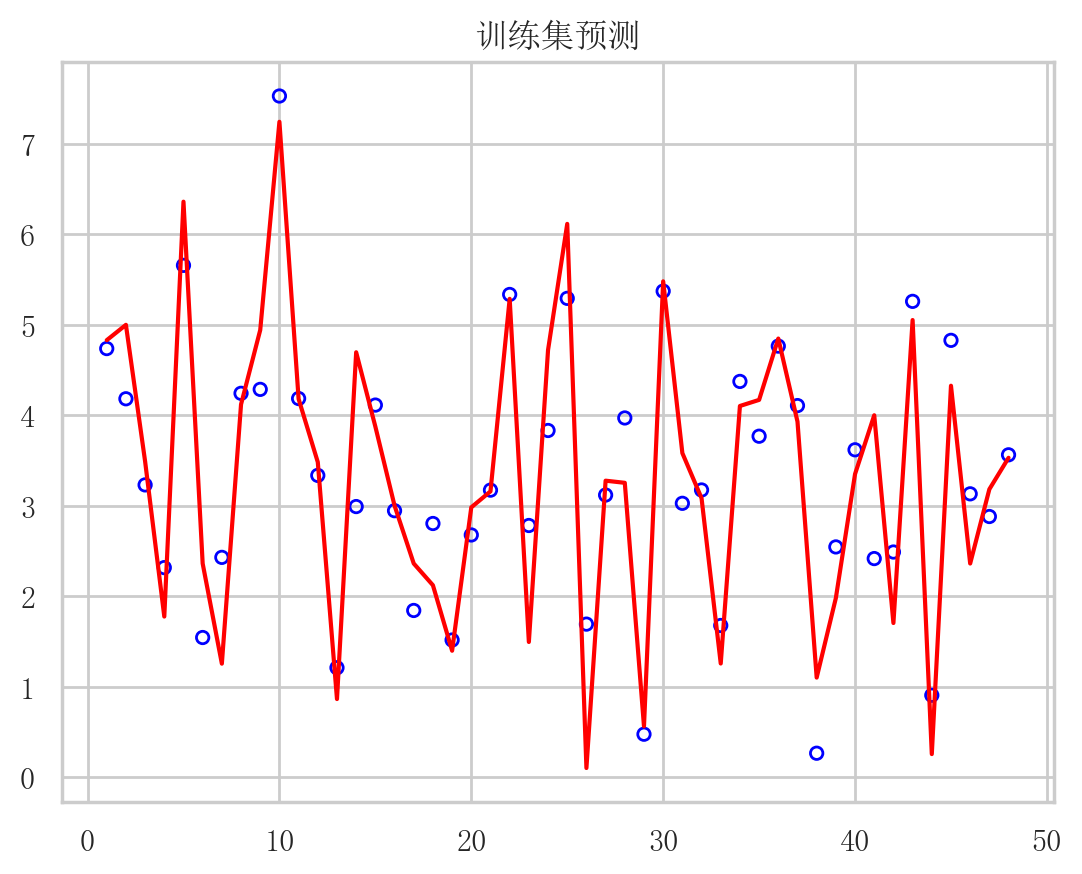

In [36]:
# 训练集预测
plt.scatter(xr_tr,y_pre_train,s=20,marker='o',facecolors="none",edgecolors='blue')
plt.plot(xr_tr,y_train,c="red")
plt.title("训练集预测")

Text(0.5, 1.0, '测试集预测')

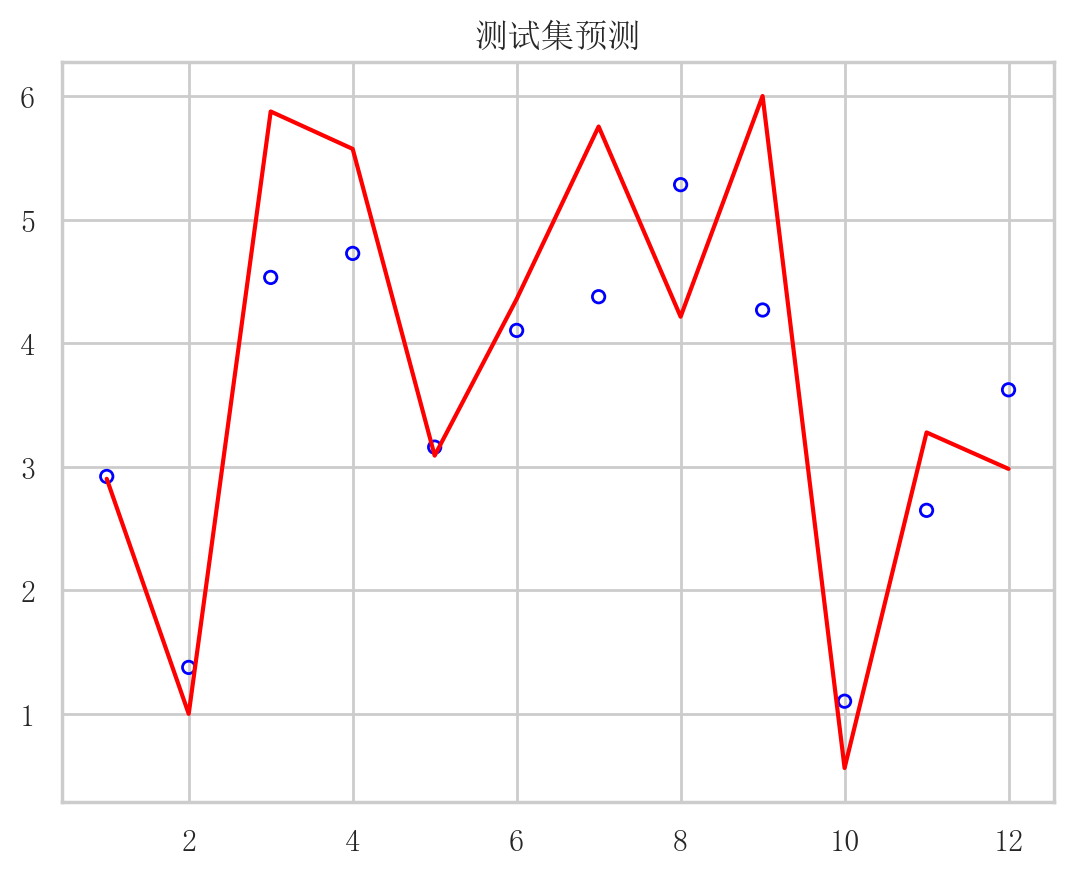

In [37]:
# 测试集预测
plt.scatter(xr_te,y_pre_test,s=20,marker='o',facecolors="none",edgecolors='blue')
plt.plot(xr_te,y_test,c="red")
plt.title("测试集预测")

In [27]:
optuna.visualization.plot_parallel_coordinate(study)

In [28]:
optuna.visualization.plot_param_importances(study)

In [29]:
optuna.visualization.plot_slice(study,params=["C","gamma"])

In [30]:
optuna.visualization.plot_optimization_history(study)